# Исследование низкоранговой аппроксимации тензоров (Hottbox)

In [49]:
import numpy as np
from PIL import Image
from tqdm.notebook import tqdm
from time import time
import matplotlib.pyplot as plt

from hottbox.core import Tensor
from hottbox.algorithms.decomposition import TTSVD, HOSVD, HOOI, CPD
from hottbox.metrics import residual_rel_error

## Данные

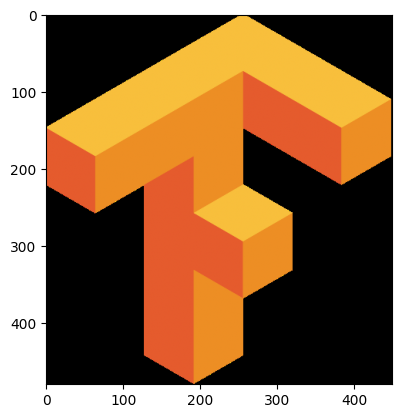

In [50]:
img = np.asarray(Image.open('images/Tensorflow_logo.png').convert('RGB')) / 255.0
plt.imshow(img);

In [51]:
print(f"Размер изображения: {img.shape}")

Размер изображения: (480, 449, 3)


In [52]:
tensor = Tensor(img)

# Эксперимент

In [53]:
names = ["CPD", "HOSVD", "HOOI", "TTSVD"]

In [54]:
presision_list = {"CPD" : [], "HOSVD" : [], "HOOI" : [], "TTSVD" : []}
time_list = {"CPD" : [], "HOSVD" : [], "HOOI" : [], "TTSVD" : []}
R_list = list(range(4, 21))

for R in tqdm(R_list):
    for name in names:
        start_time = time()
        if name == "CPD":
            tensor_pred = CPD().decompose(tensor, rank=(R, ))
        if name == "HOSVD":
            tensor_pred = HOSVD().decompose(tensor, rank=(R, R, 2))
        if name == "HOOI":
            tensor_pred = HOOI().decompose(tensor, rank=(R, R, 2))
        if name == "TTSVD":
            tensor_pred = TTSVD().decompose(tensor, rank=(R, 2))
        
        presision_list[name].append(1 - residual_rel_error(tensor, tensor_pred))
        time_list[name].append(time() - start_time)

  0%|          | 0/17 [00:00<?, ?it/s]

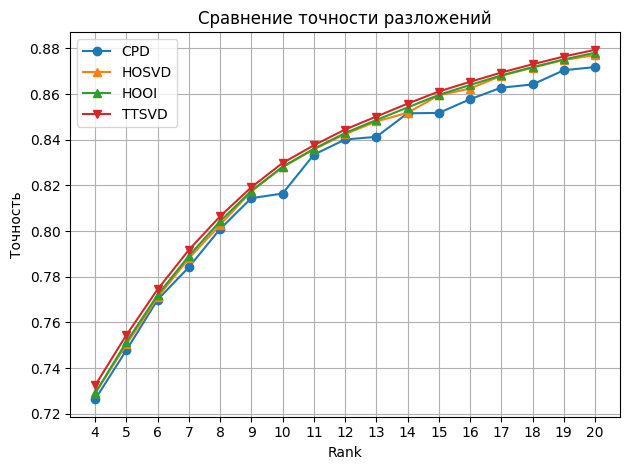

In [56]:
plt.title("Сравнение точности разложений")
plt.xlabel("Rank")
plt.xticks(R_list)
plt.ylabel("Точность")
for name, marker in zip(names, ['o', '^', '^', 'v']):
    plt.plot(R_list, presision_list[name], label=name, marker=marker)

plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("./images/precision.png")
plt.show()

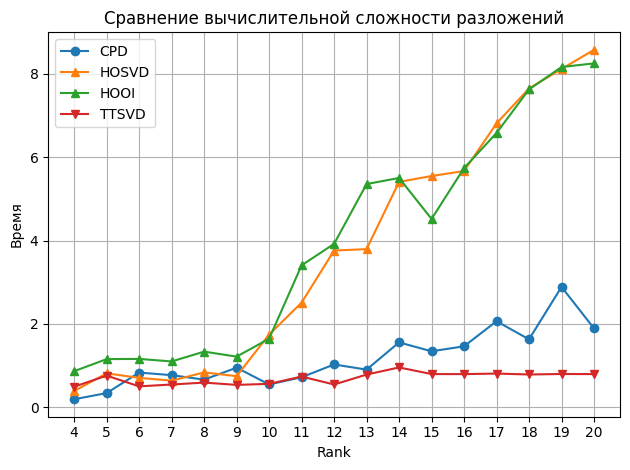

In [57]:
plt.title("Сравнение вычислительной сложности разложений")
plt.xlabel("Rank")
plt.xticks(R_list)
plt.ylabel("Время")
for name, marker in zip(names, ['o', '^', '^', 'v']):
    plt.plot(R_list, time_list[name], label=name, marker=marker)

plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("./images/time.png")
plt.show()

In [58]:
stab_list = {"CPD" : [], "HOSVD" : [], "HOOI" : [], "TTSVD" : []}
var_list = np.arange(0.1, 0.21, 0.01)
R = 7
run_times = 10

for var in tqdm(var_list):
    tmp = []
    for name in names:
        for _ in range(run_times):
            noise = np.random.normal() * var
            if name == "CPD":
                tensor_pred = CPD().decompose(Tensor(img + noise), rank=(R, ))
            if name == "HOSVD":
                tensor_pred = HOSVD().decompose(Tensor(img + noise), rank=(R, R, 2))
            if name == "HOOI":
                tensor_pred = HOOI().decompose(Tensor(img + noise), rank=(R, R, 2))
            if name == "TTSVD":
                tensor_pred = TTSVD().decompose(Tensor(img + noise), rank=(R, 2))
            tmp.append(1 - residual_rel_error(tensor, tensor_pred))
        
        stab_list[name].append(np.mean(tmp))

  0%|          | 0/11 [00:00<?, ?it/s]

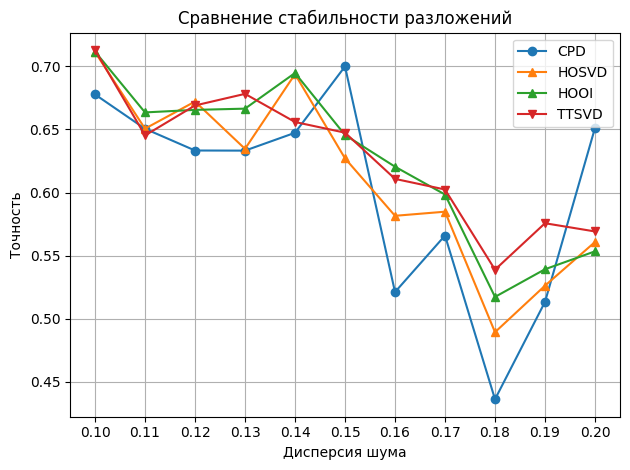

In [59]:
plt.title("Сравнение стабильности разложений")
plt.xlabel("Дисперсия шума")
plt.xticks(var_list)
plt.ylabel("Точность")
for name, marker in zip(names, ['o', '^', '^', 'v']):
    plt.plot(var_list, stab_list[name], label=name, marker=marker)

plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("./images/stab.png")
plt.show()